In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import aesara_theano_fallback.tensor as tt
import arviz as az

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
def plot_cont(self, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    samples = self.random(size=1000)
    x = np.linspace(np.min(samples), np.max(samples), 1000)
    ax.plot(x, np.exp(self.logp(x)).eval())
    return ax

# Assign this distribution to the abstract class Continuous
pm.Continuous.plot = plot_cont

(-5.0, 1.0)

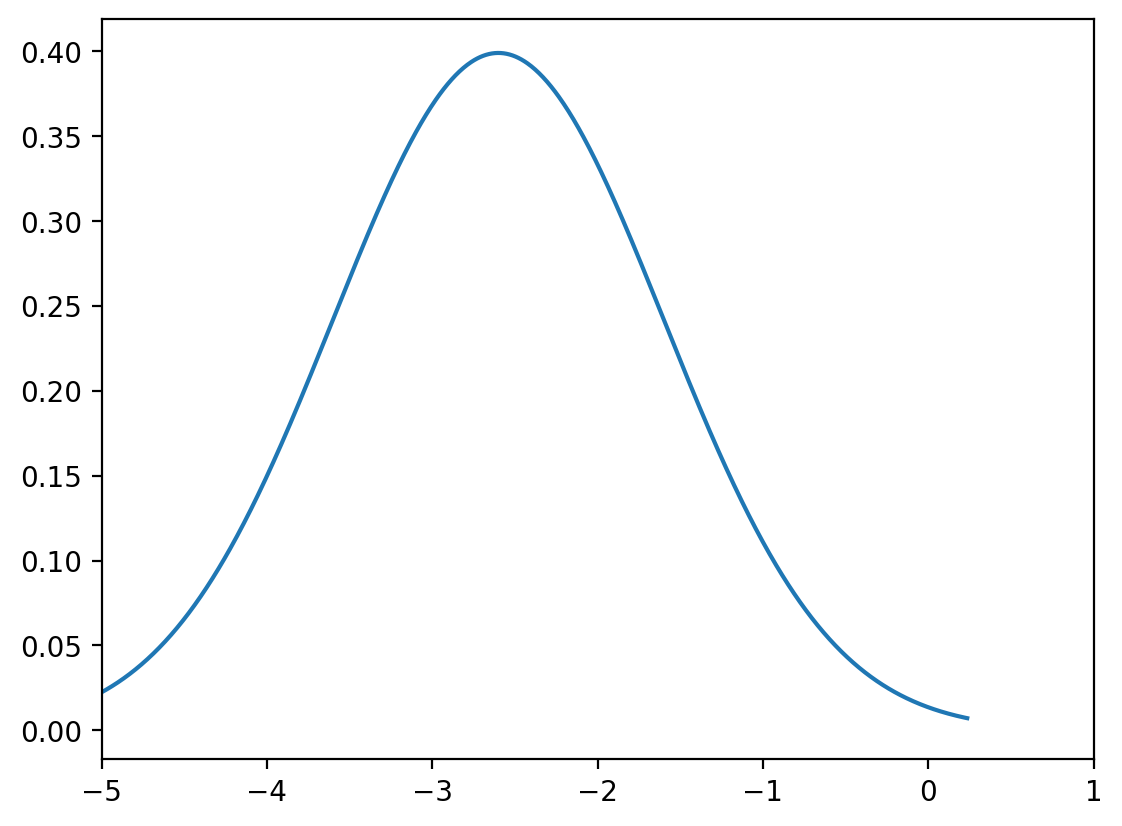

In [3]:
ax = pm.Normal.dist(mu=-2.6, sd=1).plot()
ax.set_xlim(-5,1)

In [19]:
with pm.Model() as model:
    log_ror = pm.Normal("log_ror", mu=np.log(18.85), sd=0.001)
    ror = pm.Deterministic("ror", tt.exp(log_ror))

In [20]:
with model:
    trace = pm.sample(
        tune=500, #2500,
        draws=3000, #2000,
        cores=1, #4
        chains=1, #4
        return_inferencedata=True,)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Sequential sampling (1 chains in 1 job)
NUTS: [log_ror]


Sampling 1 chain for 500 tune and 3_000 draw iterations (500 + 3_000 draws total) took 1 seconds.
The acceptance probability does not match the target. It is 0.8833262925541701, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


array([<Axes: title={'center': 'log_ror'}>,
       <Axes: title={'center': 'ror'}>], dtype=object)

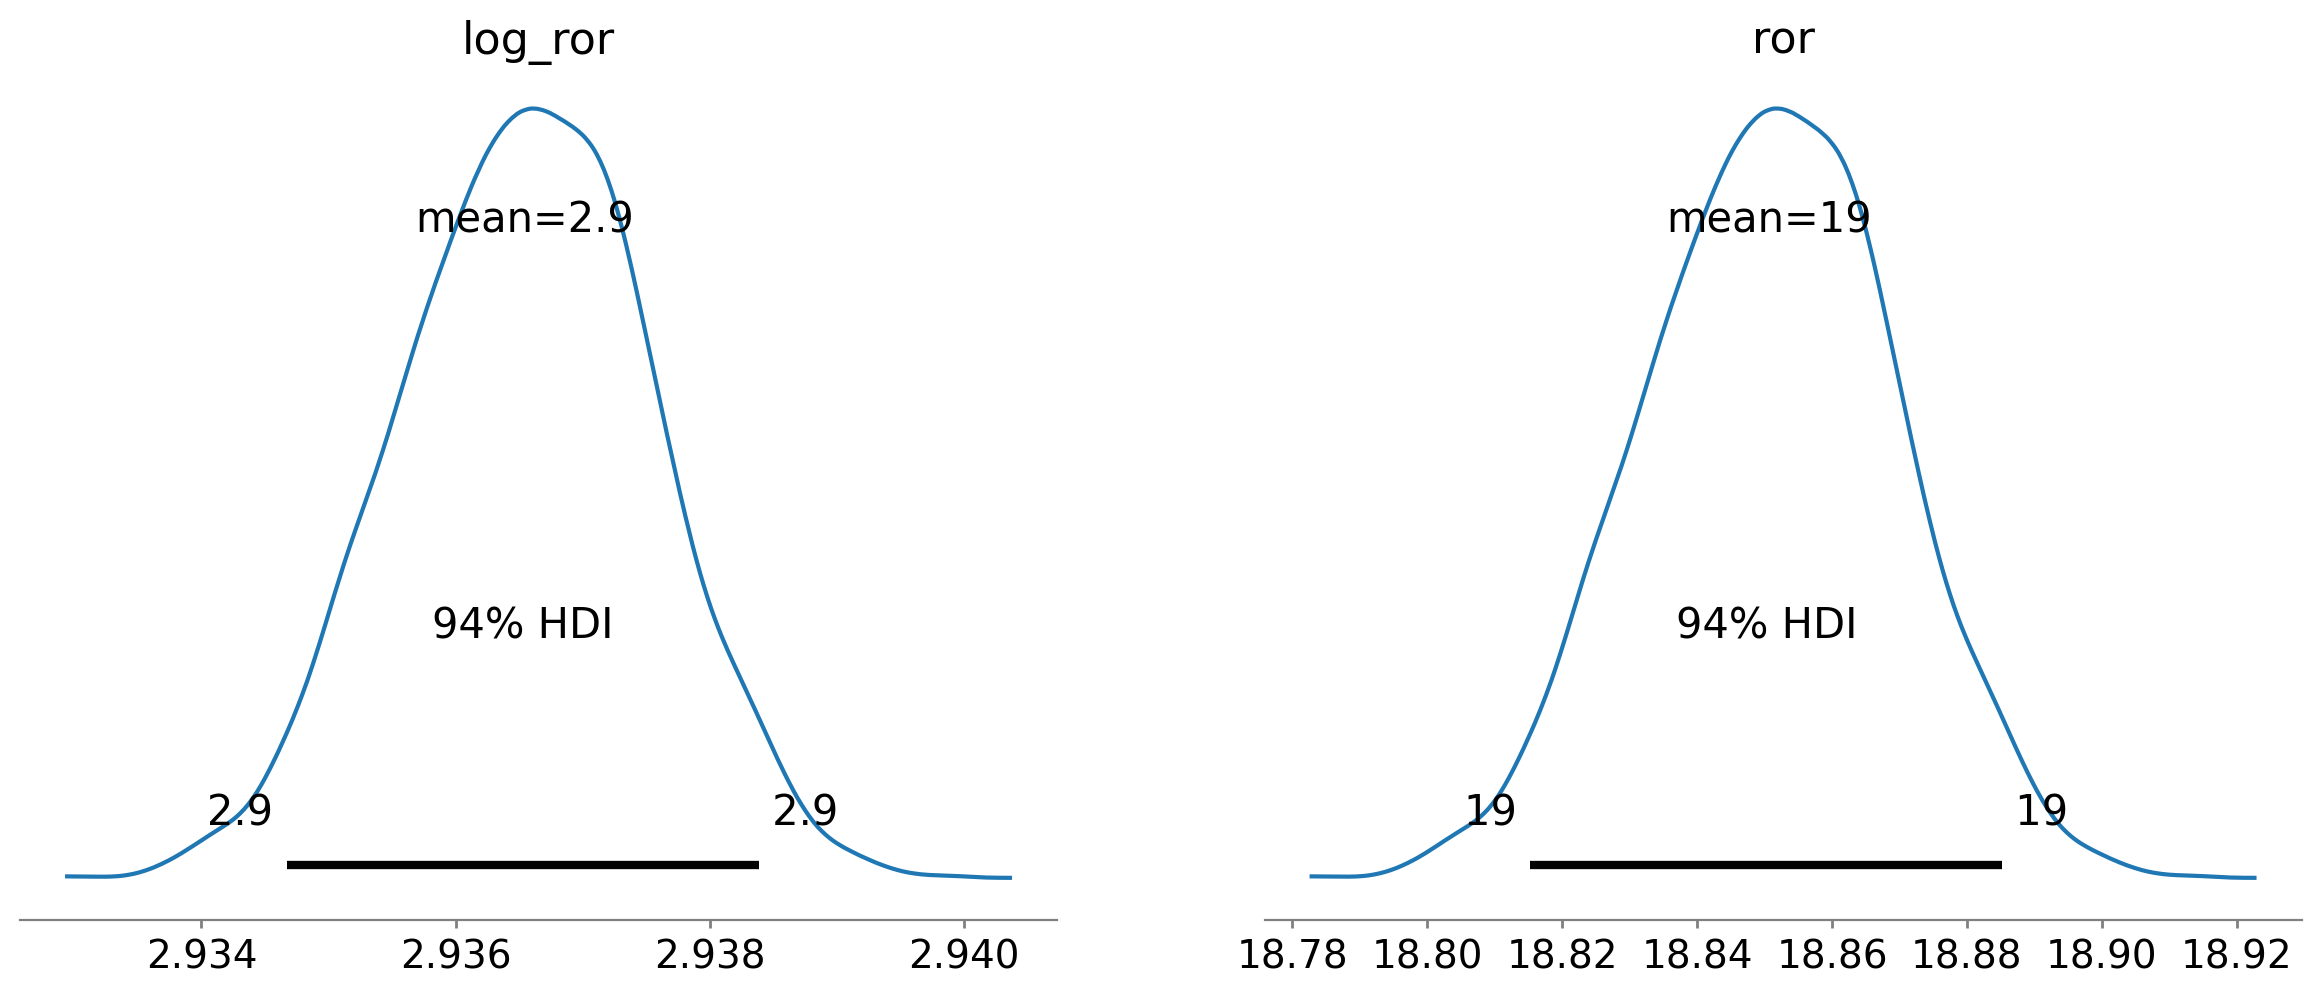

In [21]:
az.plot_posterior(trace, var_names=['log_ror', 'ror'])
